In [1]:
import torch as t
from torch import nn
device = 'cuda' if t.cuda.is_available() else 'cpu'
device

'cpu'

In [2]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating...
Unzipping pizza, steak, suhsi data to data/pizza_steak_sushi


In [3]:
import os
def walk_through(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [4]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/steak/1624747.jpg
steak
341
512


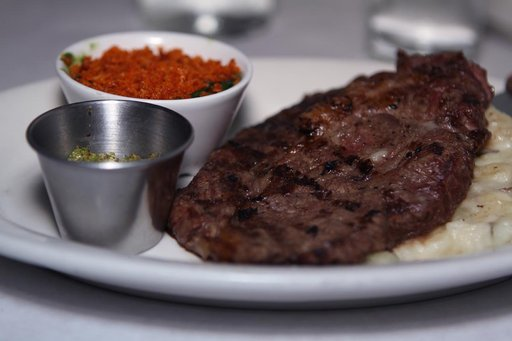

In [5]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
print(random_image_path)
image_class = random_image_path.parent.stem
print(image_class)
img = Image.open(random_image_path)
print(img.height)
print(img.width)
img

(-0.5, 511.5, 340.5, -0.5)

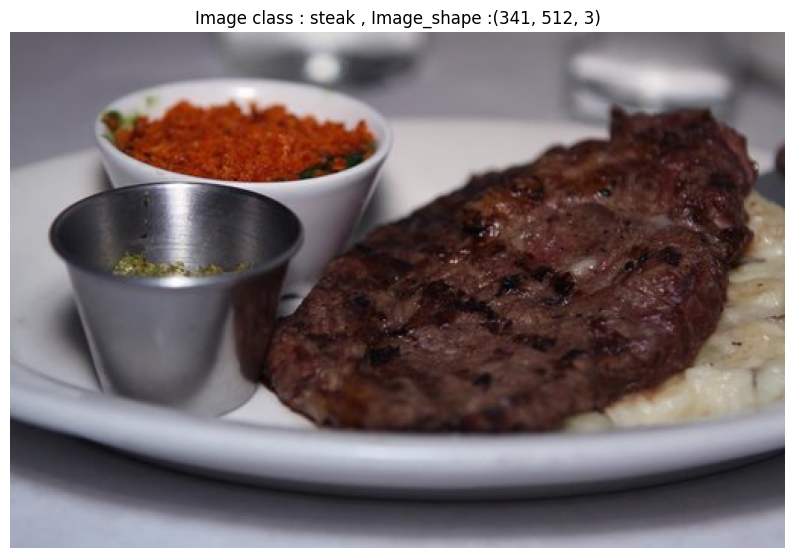

In [6]:
import numpy as np
import matplotlib.pyplot as plt

image_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(image_array)
plt.title(f"Image class : {image_class} , Image_shape :{image_array.shape}")
plt.axis(False)

In [7]:
import torchvision
from torchvision import datasets , transforms

In [8]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [9]:
data_transform(img).shape

torch.Size([3, 64, 64])

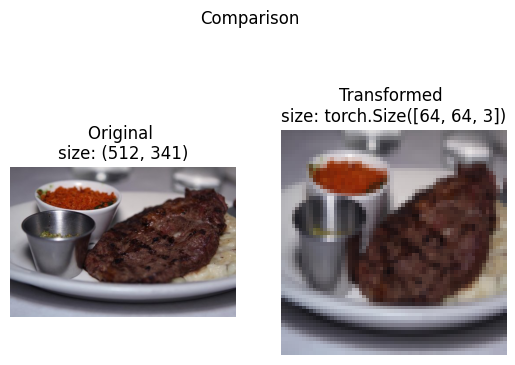

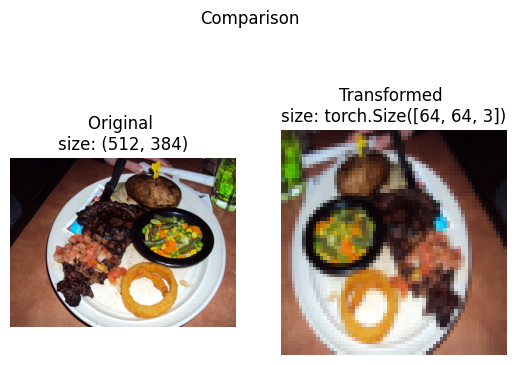

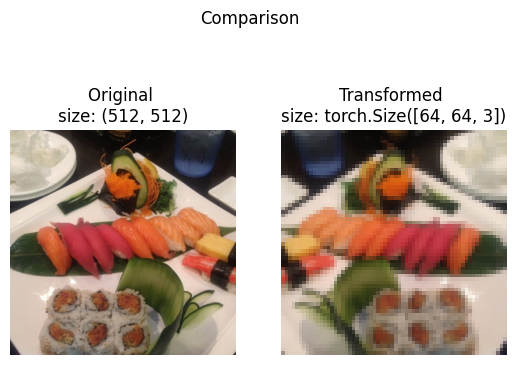

In [10]:
def transformed_image(image_path : list , seed : int , n : int , transform):
  if seed:
    random.seed(seed)
  random_image_path  = random.sample(image_path , k=n)
  for image in random_image_path:
    with Image.open(image) as f:
      fig , ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}")
      ax[0].axis(False)

      tran_image = transform(f).permute(1,2,0)
      ax[1].imshow(tran_image)
      ax[1].set_title(f"Transformed \nsize: {tran_image.shape}")
      ax[1].axis(False)

      fig.suptitle("Comparison")

transformed_image(image_path_list,
                  seed = 42,
                  n = 3,
                  transform=data_transform)


In [11]:
train_load = datasets.ImageFolder(root = train_dir,
                                  transform= data_transform)
test_load = datasets.ImageFolder(root = test_dir,
                                 transform= data_transform)
len(train_load) , len(test_load)

(225, 75)

In [12]:
class_name = train_load.classes
class_name

['pizza', 'steak', 'sushi']

In [13]:
train_load.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [14]:
from torch.utils.data import DataLoader

train_dataloads = DataLoader(dataset=train_load,
                            batch_size=1,
                            shuffle = True)
test_dataloads = DataLoader(dataset=test_load,
                           batch_size = 1,
                           shuffle= False)

In [16]:
img, label = next(iter(train_dataloads))
# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: tensor([1])


In [17]:
train_load.classes , train_load.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [18]:
from torch.utils.data import Dataset
from typing import Tuple , List , Dict

target_dir = train_dir
print(target_dir)
class_names = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names

data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [19]:
def find_classes(dir : str) -> Tuple[List[str] , Dict[str , int]]:
  classes = sorted(entry.name for entry in os.scandir(dir) if entry.is_dir())
  class_dixt = {tclass : i for i,tclass in enumerate(classes)}
  return classes , class_dixt

In [20]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [21]:
class customImagefolder(Dataset):
  def __init__(self, targetdir : str , transform = None):
    super().__init__()
    #Create class path
    self.path = list(Path(targetdir).glob("*/*jpg"))
    #Setup transform
    self.transform = transform
    #create class and class_idx
    self.classes , self.class_idx = find_classes(targetdir)

  #def image load
  def load_image(self, index : str) -> Image.Image:
    imagepath = self.path[index]
    return Image.open(imagepath)

  #Overwrite len()
  def __len__(self) -> int:
    return len(self.path)

  #Overwrite __get_item__()
  def __getitem__(self , index: str) -> Tuple[t.Tensor , int]:
    img = self.load_image(index)
    classnames = self.path[index].parent.name
    classidx = self.class_idx[classnames]
  #Transform if necessary
    if self.transform:
      return self.transform(img) , classidx

      return img , classidx


In [22]:
train_customdata = customImagefolder(train_dir , data_transform)
test_customdata = customImagefolder(test_dir , data_transform)
train_customdata , test_customdata

(<__main__.customImagefolder at 0x7d71b3ddfd30>,
 <__main__.customImagefolder at 0x7d71b9c1b6a0>)

In [23]:
train_customdata.classes , train_customdata.class_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [24]:
def display_random_shape(dataset : t.utils.data.Dataset,
                         classes : list[str],
                         n : int = 10,
                         display_shape : bool = False,
                         seed : int = None):
  #Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"Invaliad number of images")

  #Set the seed
  if seed:
    random.seed(seed)

  #Get random sample images
  random_sample = random.sample(range(len(dataset)) , k = n)

  fig = plt.figure(figsize=(16,8))
  #loop through random images and plot through matplotlib
  for i , t in enumerate(random_sample):
    image , label = dataset[t][0] , dataset[t][1]

  #Adjust tensor dimension for plotting
    t_image = image.permute(1,2,0)

    #plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(t_image)
    plt.axis("off")
    if classes:
      title = f"Classes : {classes[label]}"
      if display_shape:
        title = title + f"\nShape : {t_image.shape}"
    plt.title(title)

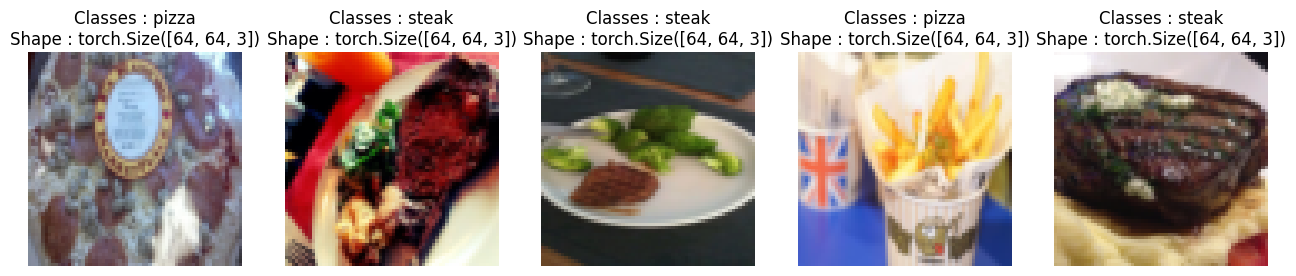

In [25]:
display_random_shape(dataset= train_customdata ,
                     classes = class_name,
                     n = 5,
                     display_shape= True,
                     seed = 42)

In [26]:
from torch.utils.data import DataLoader

train_dataload = DataLoader(dataset = train_customdata,
                            batch_size = 32,
                            shuffle = True)
test_dataload = DataLoader(dataset = test_customdata,
                           batch_size = 32,
                           shuffle = False)
train_dataload , test_dataload

(<torch.utils.data.dataloader.DataLoader at 0x7d71b3d29e70>,
 <torch.utils.data.dataloader.DataLoader at 0x7d71b3dbb9a0>)

In [27]:
img , lbl = next(iter(train_dataload))
img.shape , lbl.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))


Data augmentation involves making slight variations to training data to improve a model's ability to generalize and reduce overfitting by simulating different scenarios that data can appear in.

TrivialAugmentWide is a simple, parameter-free data augmentation technique that applies a single random augmentation operation to each image, optimizing for simplicity and effectiveness without the need for manual hyperparameter tuning.

In [58]:
train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.TrivialAugmentWide(31),
                                     transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size = (64,64)),
                                     transforms.ToTensor()])


In [29]:
random_img_path = list(image_path.glob("*/*/*.jpg"))
random_img_path[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1264154.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1787505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/75537.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/560503.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1839481.jpg')]

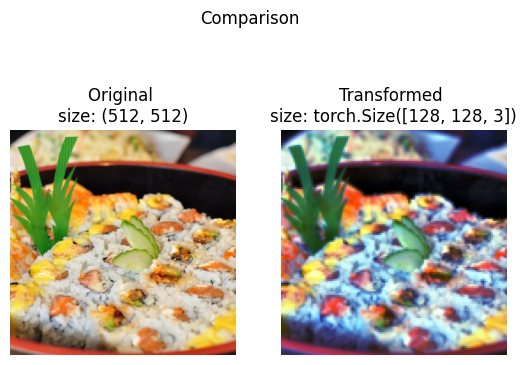

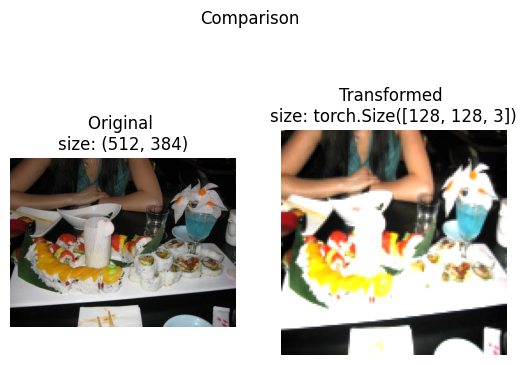

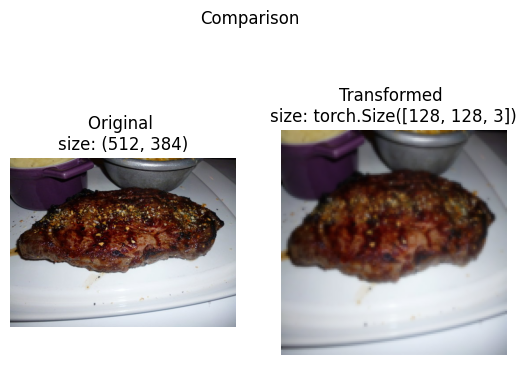

In [30]:
transformed_image(image_path= random_img_path ,
                  seed=None,
                  n=3,
                  transform=train_transform)

In [31]:
num_classes = train_customdata.classes

In [62]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

In [56]:
t.manual_seed(42)
model_0 = TinyVGG(input_shape = 3 , hidden_units = 10 , output_shape = len(num_classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=3, bias=True)
  )
)

In [37]:
img , label = next(iter(train_dataload))
model_0(img)

tensor([[0.0649, 0.0636, 0.0369],
        [0.0590, 0.0615, 0.0419],
        [0.0647, 0.0643, 0.0413],
        [0.0553, 0.0552, 0.0362],
        [0.0595, 0.0594, 0.0380],
        [0.0693, 0.0663, 0.0400],
        [0.0638, 0.0593, 0.0398],
        [0.0670, 0.0642, 0.0410],
        [0.0642, 0.0651, 0.0388],
        [0.0607, 0.0628, 0.0387],
        [0.0680, 0.0625, 0.0396],
        [0.0657, 0.0643, 0.0402],
        [0.0610, 0.0599, 0.0372],
        [0.0644, 0.0621, 0.0389],
        [0.0689, 0.0654, 0.0402],
        [0.0626, 0.0629, 0.0380],
        [0.0651, 0.0641, 0.0385],
        [0.0630, 0.0613, 0.0394],
        [0.0607, 0.0602, 0.0360],
        [0.0667, 0.0637, 0.0379],
        [0.0642, 0.0632, 0.0378],
        [0.0666, 0.0646, 0.0414],
        [0.0615, 0.0613, 0.0375],
        [0.0639, 0.0645, 0.0378],
        [0.0663, 0.0674, 0.0349],
        [0.0607, 0.0608, 0.0371],
        [0.0694, 0.0651, 0.0399],
        [0.0652, 0.0585, 0.0419],
        [0.0641, 0.0650, 0.0380],
        [0.067

other way is to do by torchinfo summary(model_name , inputs)

In [38]:
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model_0.parameters(), lr=0.01)

In [71]:
def train_model(model : t.nn.Module,
                dataset : t.utils.data.DataLoader,
                loss_fn : t.nn.Module,
                optimizer : t.optim.Optimizer):
  total_loss = 0
  model.train()
  for batch, (X,y) in  enumerate(dataset):
    y_logit = model(X)
    loss = loss_fn(y_logit , y)
    optimizer.zero_grad()
    loss.backward()
    total_loss += loss.item()
    optimizer.step()
  total_loss /= len(dataset)
  return total_loss

def test_model(model : t.nn.Module,
              dataset : t.utils.data.DataLoader,
              loss_fn : t.nn.Module):

  model.eval()
  with t.inference_mode():
    loss = 0
    for X,y in dataset:
      y_logit = model(X)
      loss += loss_fn(y_logit , y).item()
    loss /= len(dataset)
    return loss

In [73]:
def train(model : t.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer:t.optim.Optimizer,
          loss_fn: t.nn.Module = nn.CrossEntropyLoss(),
          epochs : int = 5):
  results = {"train_loss": [], "test_loss": []}
  for epoch in range(epochs):
    train_loss = train_model(model,
                train_dataloader,
                loss_fn,
                optimizer)
    test_loss = test_model(model,
                test_dataloader,
                loss_fn)
    if epoch % 5 == 0:
      print(f"Epoch: {epoch + 1}, Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    results["train_loss"].append(train_loss)
    results["test_loss"].append(test_loss)
  return results



In [46]:
# Train for 50 epochs
t.manual_seed(42)
t.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(num_classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloads,
                        test_dataloader=test_dataloads,
                        optimizer=optimizer,
                        epochs=50)

Epoch: 1, Training Loss: 1.1171, Test Loss: 1.0974
Epoch: 2, Training Loss: 1.0999, Test Loss: 1.0990
Epoch: 3, Training Loss: 1.1161, Test Loss: 1.0971
Epoch: 4, Training Loss: 1.0748, Test Loss: 1.0463
Epoch: 5, Training Loss: 0.9320, Test Loss: 1.0430
Epoch: 6, Training Loss: 0.9238, Test Loss: 0.9586
Epoch: 7, Training Loss: 0.8715, Test Loss: 0.9757
Epoch: 8, Training Loss: 0.8521, Test Loss: 0.9555
Epoch: 9, Training Loss: 0.8078, Test Loss: 0.9725
Epoch: 10, Training Loss: 0.7718, Test Loss: 0.9863
Epoch: 11, Training Loss: 0.7351, Test Loss: 0.9988
Epoch: 12, Training Loss: 0.6985, Test Loss: 1.0139
Epoch: 13, Training Loss: 0.6652, Test Loss: 1.1601
Epoch: 14, Training Loss: 0.5931, Test Loss: 1.1393
Epoch: 15, Training Loss: 0.5474, Test Loss: 1.1935
Epoch: 16, Training Loss: 0.5096, Test Loss: 1.2801
Epoch: 17, Training Loss: 0.4876, Test Loss: 1.3450
Epoch: 18, Training Loss: 0.4193, Test Loss: 1.5576
Epoch: 19, Training Loss: 0.3813, Test Loss: 1.4182
Epoch: 20, Training L

In [50]:
def plotcurves(results : Dict[str , List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs , loss , label = "train_loss")
  plt.plot(epochs , test_loss , label = "test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

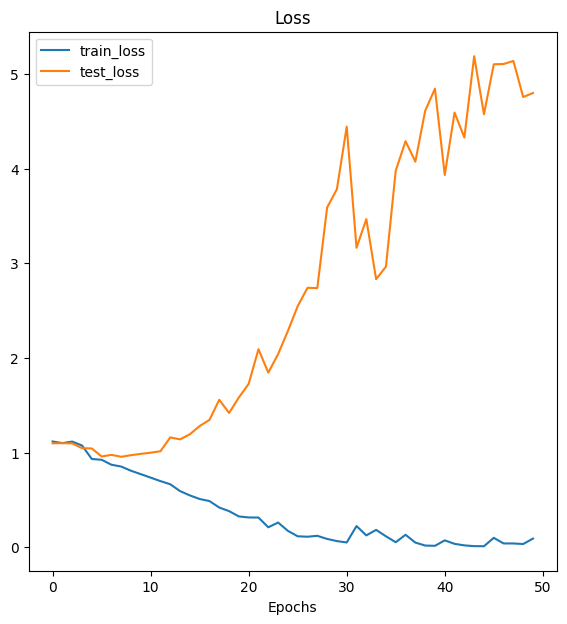

In [51]:
plotcurves(model_2_results)

Model Overfitting it trains noise in out dataset too here it performs well on testing data but underperforms training data.

Way to reduce overfitting
can simplify the model by reducing layers
adding more data
data augmentation where we can add more diversity to our training data
use of transfer learning adapt pattern from different models
use early stop , reduce learning rate

Model underfitting occurs when a machine learning model is too simple to capture the underlying pattern of the data, leading to poor performance on both training and validation datasets. here loss can be lower not sure
about it.

for underfitting:
increase more layers
change learning rate
use transfer learning
train for more longer time

In [127]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=62720,
                  out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

In [128]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [129]:
train_load = datasets.ImageFolder(root = train_dir,
                                  transform= data_transform)
test_load = datasets.ImageFolder(root = test_dir,
                                 transform = test_transform )
len(train_load) , len(test_load)

(225, 75)

In [130]:
train_dataloads = DataLoader(dataset=train_load,
                            batch_size=32,
                            shuffle = True)
test_dataloads = DataLoader(dataset=test_load,
                           batch_size = 32,
                           shuffle= False)

In [131]:
# Train for 50 epochs
t.manual_seed(42)
t.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(num_classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloads,
                        test_dataloader=test_dataloads,
                        optimizer=optimizer,
                        epochs=20)

Epoch: 1, Training Loss: 1.1580, Test Loss: 1.0861
Epoch: 6, Training Loss: 1.0333, Test Loss: 1.0658
Epoch: 11, Training Loss: 0.9039, Test Loss: 1.1125
Epoch: 16, Training Loss: 0.7915, Test Loss: 0.9872


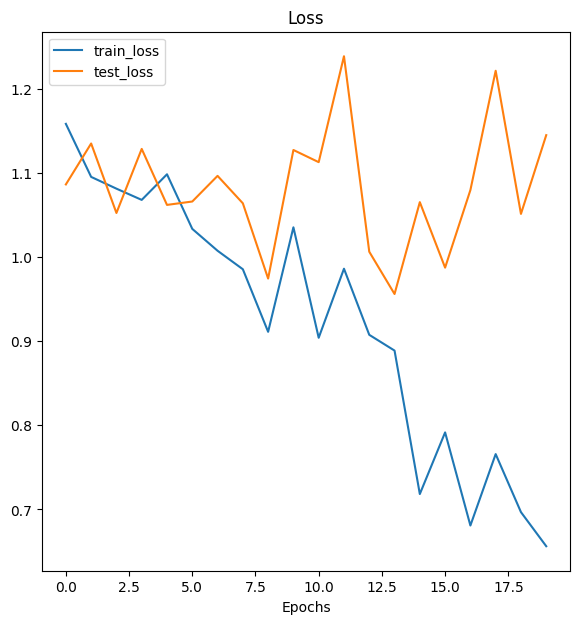

In [132]:
plotcurves(model_2_results)

In [110]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [133]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

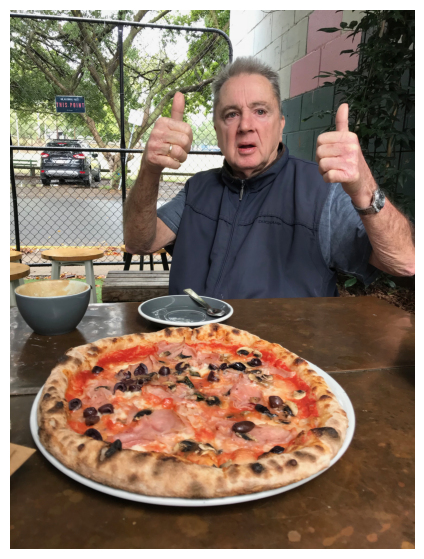

In [134]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

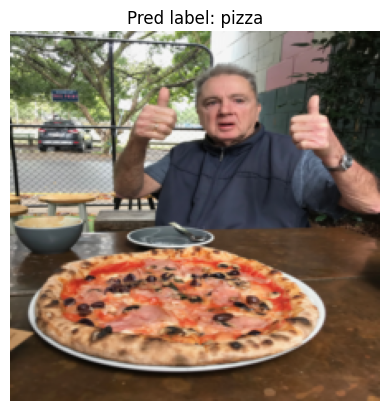

In [135]:
# Make a prediction on the image
model_2.eval()
with t.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((224, 224))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_2(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = t.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);